In [ ]:
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
from google.colab import files 
import io
from sklearn.linear_model import Perceptron


In [ ]:
uploaded = files.upload()

df = pd.read_csv(io.BytesIO(uploaded['letters.data']), header = None)

Saving letters.data to letters.data


In [ ]:
color_map = plt.cm.get_cmap('gray')
reversed_color_map = color_map.reversed()

In [ ]:
class SLP(object):
  def __init__(self, eta=0.05, n_iter=10, random_state=1):
    self.eta  = eta
    self.n_iter = n_iter
    self.random_state = random_state
  def fit(self, X, y):
    # self.errors_ = None
    self.network = []
    for i in range(0,len(X)):
      self.network.append(Perceptron(eta0 = self.eta, max_iter = self.n_iter, random_state= self.random_state))
    for i in range(0,len(X)):
      self.network[i].fit(X,y.iloc[:,i])
    return self.network 
  def predict(self, X):
    self.predictedArr = []
    for i in range(0,len(X)):
      self.predictedArr.append(self.network[i].predict(X))
    return self.predictedArr
  def misclassified(self, X,y):
    predictedForCompare = self.predict(X)
    mis = 0
    for i in range(0,len(X)):
      for j in range(0,len(X)):
        if predictedForCompare[i][j] != y.iloc[i,j]:
          mis +=1
    return mis      
  def show(self, X):
      fi,ax = plt.subplots(nrows = 2, ncols = int(len(X)/2),figsize = (25,10))
      k = 0
      for i in range(0,2):
        for j in range(0,int(len(X)/2)):
          row = X[k]
          k += 1
          arrForDraw = np.array([])
          for m in range (0,35):
            arrForDraw = np.append(arrForDraw,row[m])
          ax[i][j].imshow(arrForDraw.reshape(7,5),cmap=reversed_color_map)  
          ax[i][j].axis('off')  

In [ ]:
def damage(X,percent,seed = 1):
  rgen = np.random.RandomState(seed)
  result = np.array(X)
  count = int(X.shape[1]*percent/100)

  for index_example in range(len(X)):
    order = np.sort(rgen.choice(X.shape[1],count,replace = False))
    for index_pixel in order:
      result[index_example][index_pixel] *=-1

  return result

In [ ]:
net = SLP()

In [ ]:
scliceY = list(np.array([ 4,  5,  6, 11, 15, 16, 18, 19, 20, 25]) + 35)
X = df.iloc[[ 4,  5,  6, 11, 15, 16, 18, 19, 20, 25],0:35]
y = df.iloc[[ 4,  5,  6, 11, 15, 16, 18, 19, 20, 25],scliceY]
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,1,1,1,1,1,-1,-1,-1,-1,...,1,-1,-1,-1,-1,1,1,1,1,1
1,1,1,1,1,1,1,-1,-1,-1,-1,...,1,-1,-1,-1,-1,1,-1,-1,-1,-1
2,-1,1,1,1,-1,1,-1,-1,-1,1,...,1,-1,-1,-1,1,-1,1,1,1,-1
3,1,-1,-1,-1,-1,1,-1,-1,-1,-1,...,1,-1,-1,-1,-1,1,1,1,1,1
4,1,1,1,1,-1,1,-1,-1,-1,1,...,1,-1,-1,-1,-1,1,-1,-1,-1,-1
5,-1,1,1,1,-1,1,-1,-1,-1,1,...,1,-1,-1,1,1,-1,1,1,1,1
6,-1,1,1,1,-1,1,-1,-1,-1,1,...,1,-1,-1,-1,1,-1,1,1,1,-1
7,1,1,1,1,1,-1,-1,1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,1,-1,-1
8,1,-1,-1,-1,1,1,-1,-1,-1,1,...,1,-1,-1,-1,1,-1,1,1,1,-1
9,1,1,1,1,1,-1,-1,-1,-1,1,...,1,-1,-1,-1,-1,1,1,1,1,1


In [ ]:
y

,39,40,41,46,50,51,53,54,55,60
0,1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
2,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
3,-1,-1,-1,1,-1,-1,-1,-1,-1,-1
4,-1,-1,-1,-1,1,-1,-1,-1,-1,-1
5,-1,-1,-1,-1,-1,1,-1,-1,-1,-1
6,-1,-1,-1,-1,-1,-1,1,-1,-1,-1
7,-1,-1,-1,-1,-1,-1,-1,1,-1,-1
8,-1,-1,-1,-1,-1,-1,-1,-1,1,-1
9,-1,-1,-1,-1,-1,-1,-1,-1,-1,1


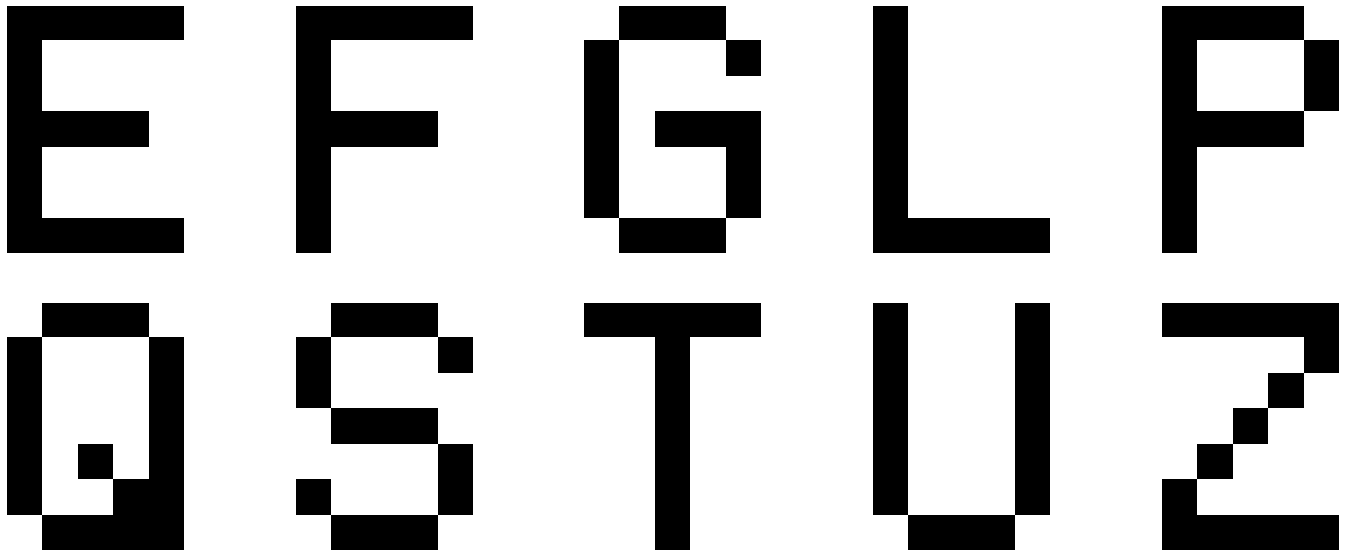

In [ ]:
net.show(X.values)

In [ ]:
net.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


[Perceptron(eta0=0.05, max_iter=10, random_state=1),
 Perceptron(eta0=0.05, max_iter=10, random_state=1),
 Perceptron(eta0=0.05, max_iter=10, random_state=1),
 Perceptron(eta0=0.05, max_iter=10, random_state=1),
 Perceptron(eta0=0.05, max_iter=10, random_state=1),
 Perceptron(eta0=0.05, max_iter=10, random_state=1),
 Perceptron(eta0=0.05, max_iter=10, random_state=1),
 Perceptron(eta0=0.05, max_iter=10, random_state=1),
 Perceptron(eta0=0.05, max_iter=10, random_state=1),
 Perceptron(eta0=0.05, max_iter=10, random_state=1)]

In [ ]:
net.predict(X)

[array([ 1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1,  1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1,  1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1,  1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1,  1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1,  1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1,  1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1,  1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  1])]

In [ ]:
# net.errors_

In [ ]:
net.misclassified(X,y)

0

In [ ]:
damaged5 = damage(X,5)
damaged15 = damage(X,15)
damaged40 = damage(X,40)

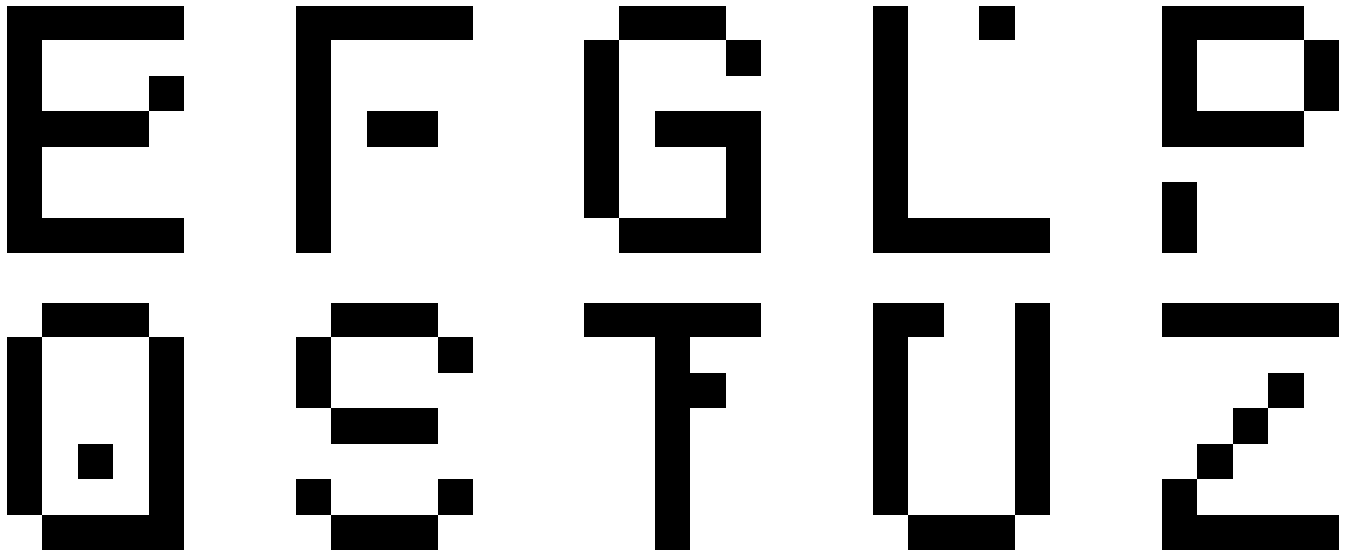

In [ ]:
net.show(damaged5)

In [ ]:
net.predict(damaged5)

[array([ 1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1,  1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1,  1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1,  1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1,  1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1,  1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1,  1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1,  1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  1])]

In [ ]:
net.misclassified(damaged5,y)

1

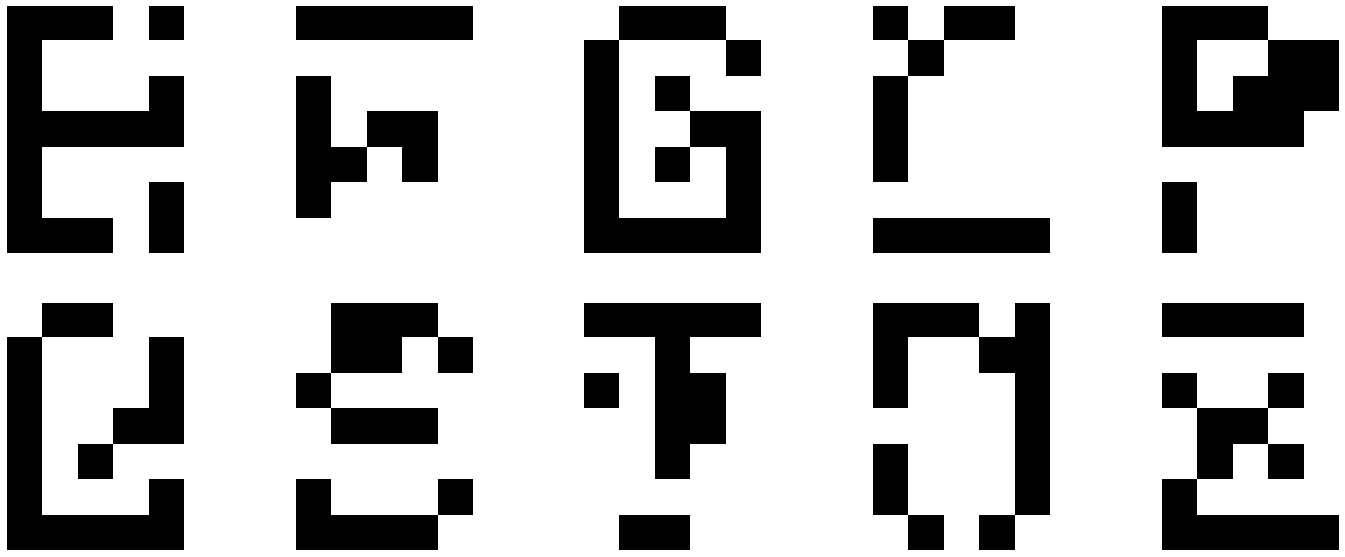

In [ ]:
net.show(damaged15)

In [ ]:
net.predict(damaged15)

[array([ 1, -1, -1, -1, -1,  1, -1, -1, -1, -1]),
 array([ 1,  1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1,  1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  1]),
 array([ 1, -1, -1, -1,  1,  1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1,  1, -1,  1, -1, -1,  1]),
 array([-1, -1, -1, -1, -1, -1, -1,  1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1,  1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  1])]

In [ ]:

net.misclassified(damaged15,y)

11

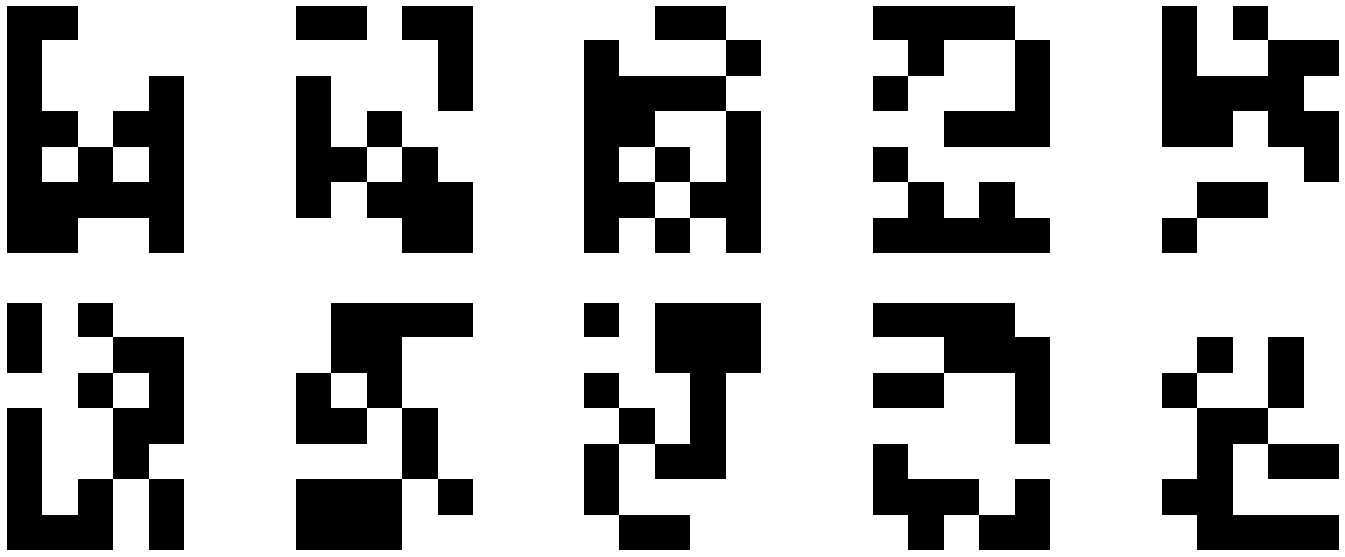

In [ ]:
net.show(damaged40)

In [ ]:
net.predict(damaged40)

[array([ 1, -1,  1,  1, -1,  1,  1, -1, -1,  1]),
 array([ 1, -1,  1, -1,  1, -1,  1, -1, -1, -1]),
 array([-1, -1, -1, -1,  1,  1,  1, -1, -1, -1]),
 array([ 1, -1,  1, -1,  1, -1, -1, -1, -1,  1]),
 array([ 1,  1,  1,  1,  1,  1, -1, -1,  1, -1]),
 array([ 1, -1,  1, -1, -1, -1, -1, -1, -1, -1]),
 array([ 1, -1,  1, -1,  1, -1, -1, -1, -1,  1]),
 array([-1, -1, -1, -1,  1, -1,  1, -1, -1, -1]),
 array([-1, -1, -1, -1,  1, -1, -1,  1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  1])]

In [ ]:
net.misclassified(damaged40,y)

39